## Interventions for Questions where diagram is Essential

Numbers:
1. No Errors: 24
2. Calculation Error: 1
3. Conceptual Error: 9
4. Misread Diagram: 12

Total: 46
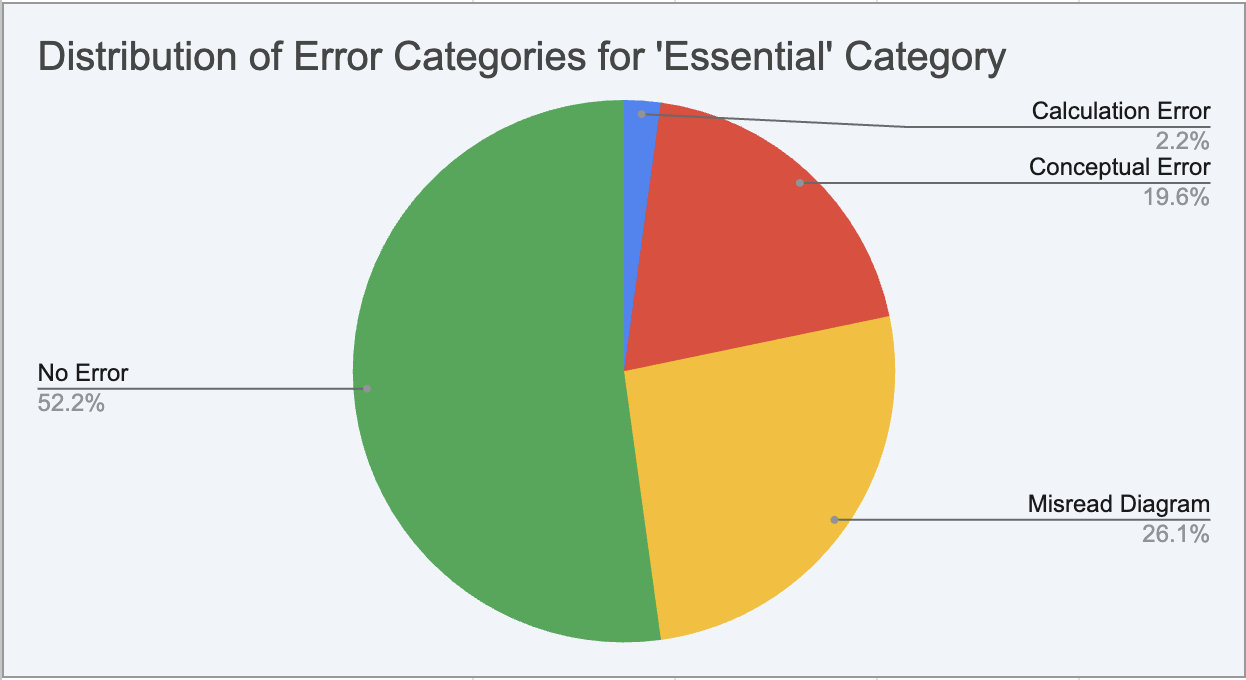

## Boilerplate Code

In [1]:
import json
import os
from dotenv import load_dotenv
import json
from pathlib import Path
from openai import OpenAI
import base64, mimetypes
from IPython.display import Image, display
import time
import pandas as pd
import gspread
from google.colab import auth
from google.auth import default
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
from google.colab import drive
drive.mount('/content/drive')
from google.colab import userdata
OPENAI_API_KEY=userdata.get('OPENAI_API_KEY')
import cv2

Mounted at /content/drive


In [20]:
history = []
client = OpenAI(api_key=OPENAI_API_KEY)
def reset_history(system_message=""):
    """Reset chat history with a fresh system prompt."""
    global history
    history = [
        {
            "role": "system",
            "content": [
                {"type": "input_text", "text": system_message}
            ],
        }
    ]
    return history


# Initialize default history
reset_history()


# -------------------------
# Helper: Encode images → data URLs
# -------------------------
def encode_images(image_paths):
    blocks = []
    for img_path in image_paths or []:
        mime, _ = mimetypes.guess_type(img_path)
        mime = mime or "image/png"
        with open(img_path, "rb") as f:
            b64 = base64.b64encode(f.read()).decode("utf-8")
        data_url = f"data:{mime};base64,{b64}"
        blocks.append({"type": "input_image", "image_url": data_url})
    return blocks


# -------------------------
# Chat Turn Function (images optional)
# -------------------------
def chat_turn(user_message: str, image_paths=None):
    # Build user's message content
    content_blocks = encode_images(image_paths)
    content_blocks.append({"type": "input_text", "text": user_message})

    # Add to history
    history.append({
        "role": "user",
        "content": content_blocks,
    })

    # Call model with all previous turns
    response = client.responses.create(
        model="gpt-5",
        input=history,
        reasoning={"effort": "low"},
        text={"verbosity": "low"}
    )

    # Extract assistant text response
    assistant_text = response.output_text  # ❤️ simple helper from new API

    # Append back into history
    history.append({
        "role": "assistant",
        "content": [
            {"type": "output_text", "text": assistant_text}
        ],
    })

    return assistant_text

## Misread Diagram

###Q53

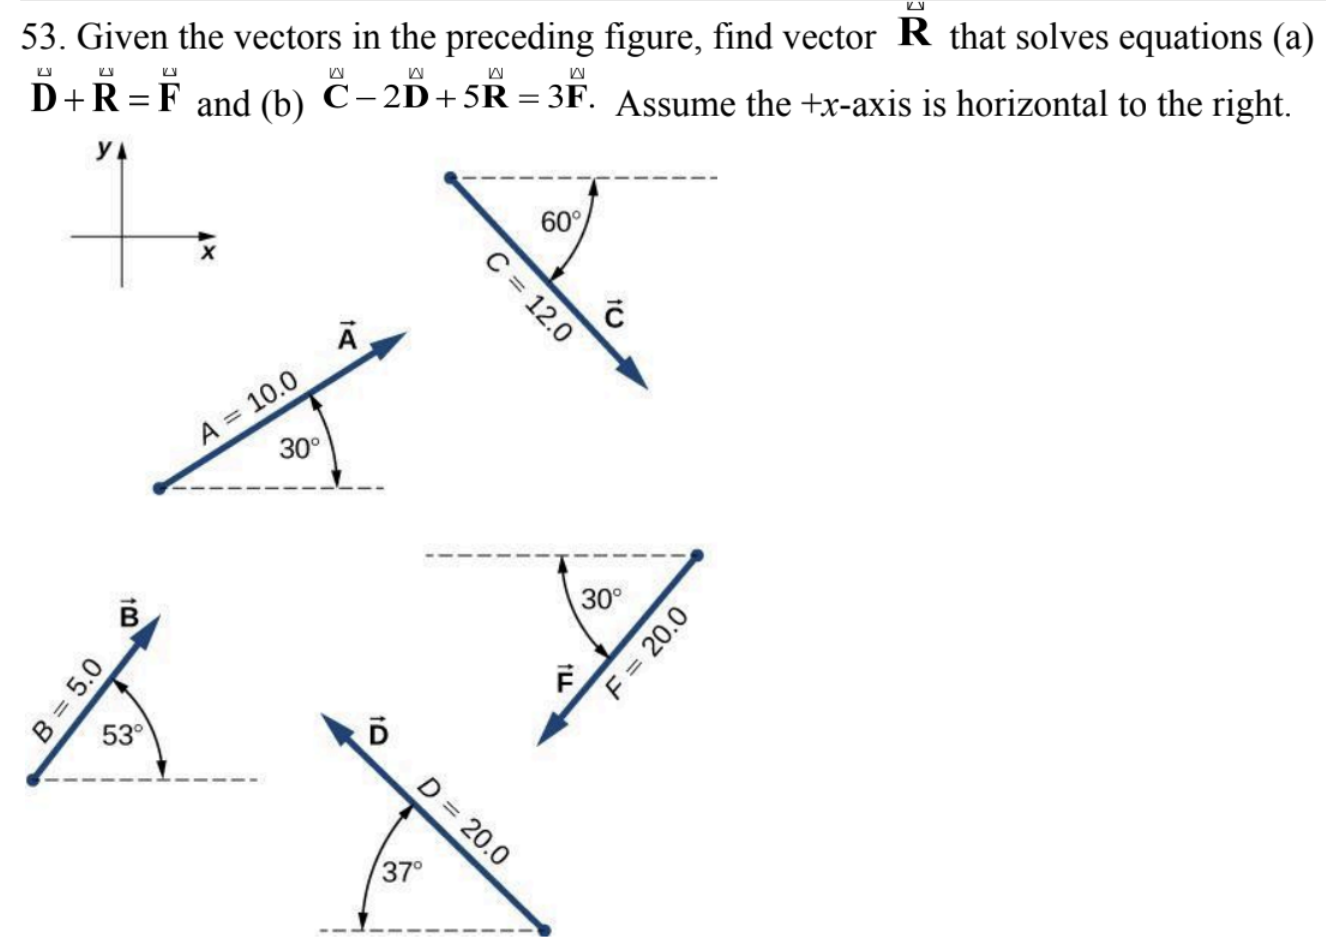

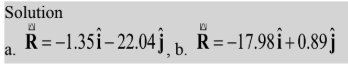

In [43]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_2_Vectors_4/53/q.png"
resp = chat_turn("Describe what you observe in the figure", image_paths=[img_path])
print(resp)

- A reference x–y axis is shown (+x to the right, +y up).
- Five vectors are drawn with magnitudes and angles:
  - A: magnitude 10.0, pointing up and to the right, 30° above the +x-axis.
  - B: magnitude 5.0, pointing up and to the right, 53° above the +x-axis.
  - C: magnitude 12.0, pointing down and to the right, 60° below the +x-axis.
  - D: magnitude 20.0, pointing down and to the right; its angle is 37° from the +y-axis (i.e., 53° below the +x-axis).
  - F: magnitude 20.0, pointing down and to the left, 30° below the negative x-direction (i.e., 150° from +x).


In [44]:
prompt = (
        "Corrections: "
        "1. Vector D is pointing up-and-left ; its angle is 37 from -x-axis"
    )
resp = chat_turn(prompt)
print(resp)

Noted. Revised description of D:
- D: magnitude 20.0, pointing up and to the left; its direction is 37° above the −x-axis (i.e., 143° measured from +x).


In [45]:
prompt = (
        "Solve the question"
    )
resp = chat_turn(prompt)
print(resp)

Using components (units): 
- C = (6.00, −10.392) 
- D = (−15.973, 12.036) 
- F = (−17.321, −10.000)

(a) D + R = F → R = F − D = (−1.35, −22.04) 
- |R| ≈ 22.1, direction ≈ −93.5° from +x (≈3.5° left of straight down).

(b) C − 2D + 5R = 3F → R = (3F − C + 2D)/5 = (−17.98, 0.893) 
- |R| ≈ 18.0, direction ≈ 177.1° from +x (≈2.9° above −x).


In [46]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]